# Machine Learning

### Random Forests

Antes de falar de Random Forests vamos entender Decision Trees.

Texto interessante: [Random Forests](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

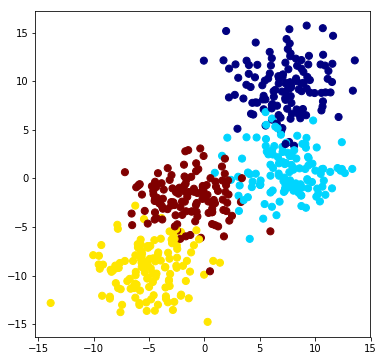

In [2]:
# Criando datasets
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=4, random_state=8, cluster_std=2.4)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap='jet')
# plt.scatter(X[:,0], X[:,1], s = 150, cmap='jet', alpha=0.1)

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

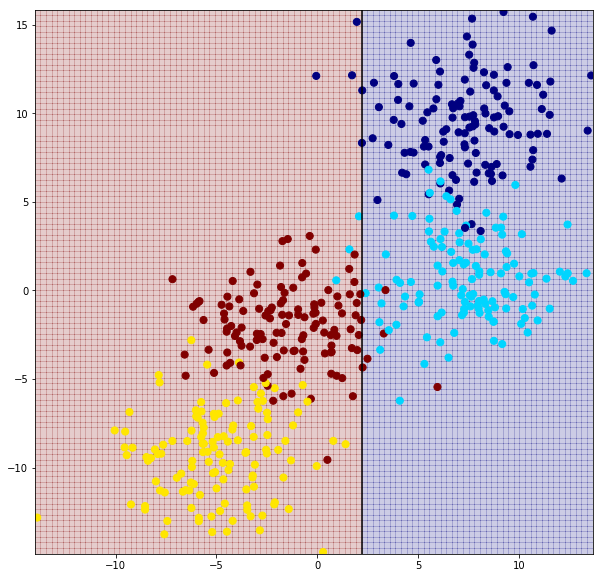

In [5]:
clf = DecisionTreeClassifier(max_depth=1, random_state=0)

visualize_tree(clf, X, y)

In [6]:
np.bincount(y)

array([125, 125, 125, 125])

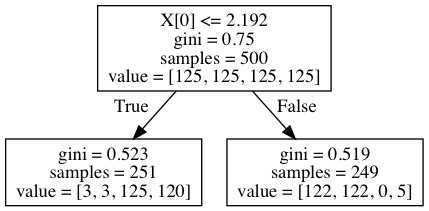

In [9]:
import pydotplus
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file='aula.dot') 
graph = pydotplus.graph_from_dot_file('aula.dot') 
graph.write_jpg('decisiontree_depth_1.jpg')

from IPython.display import Image 
Image('decisiontree_depth_1.jpg')

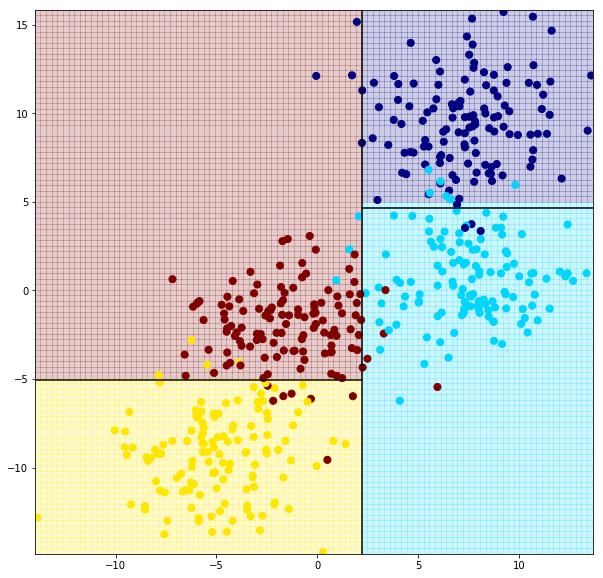

In [10]:
clf = DecisionTreeClassifier(max_depth=2, random_state=0)

visualize_tree(clf, X, y)

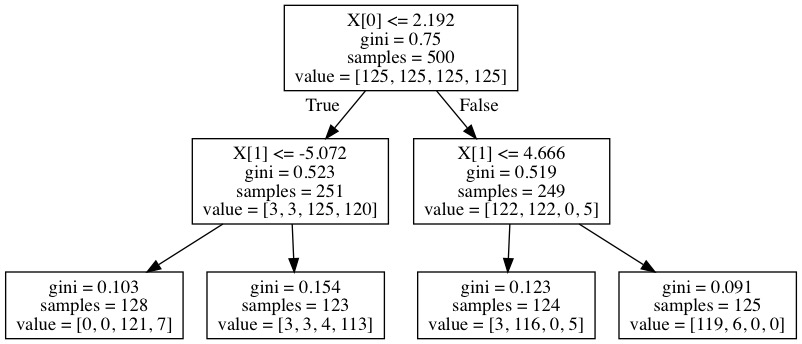

In [11]:
import pydotplus
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file='aula.dot') 
graph = pydotplus.graph_from_dot_file('aula.dot') 
graph.write_jpg('decisiontree_depth_2.jpg')

from IPython.display import Image 
Image('decisiontree_depth_2.jpg')

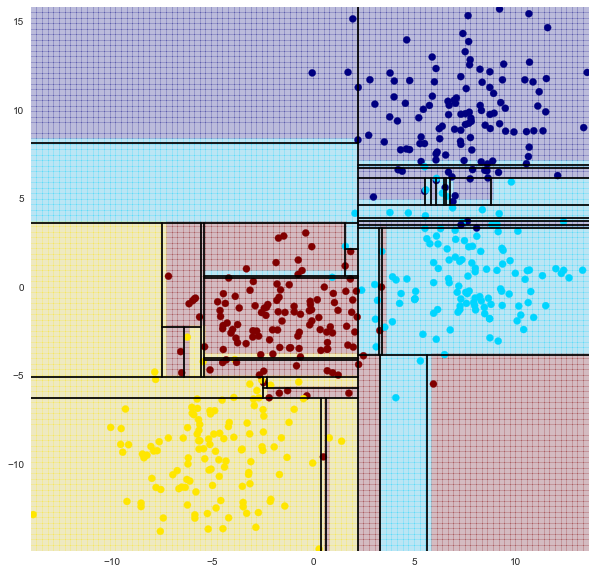

In [11]:
clf = DecisionTreeClassifier(max_depth=10, random_state=0)

visualize_tree(clf, X, y)

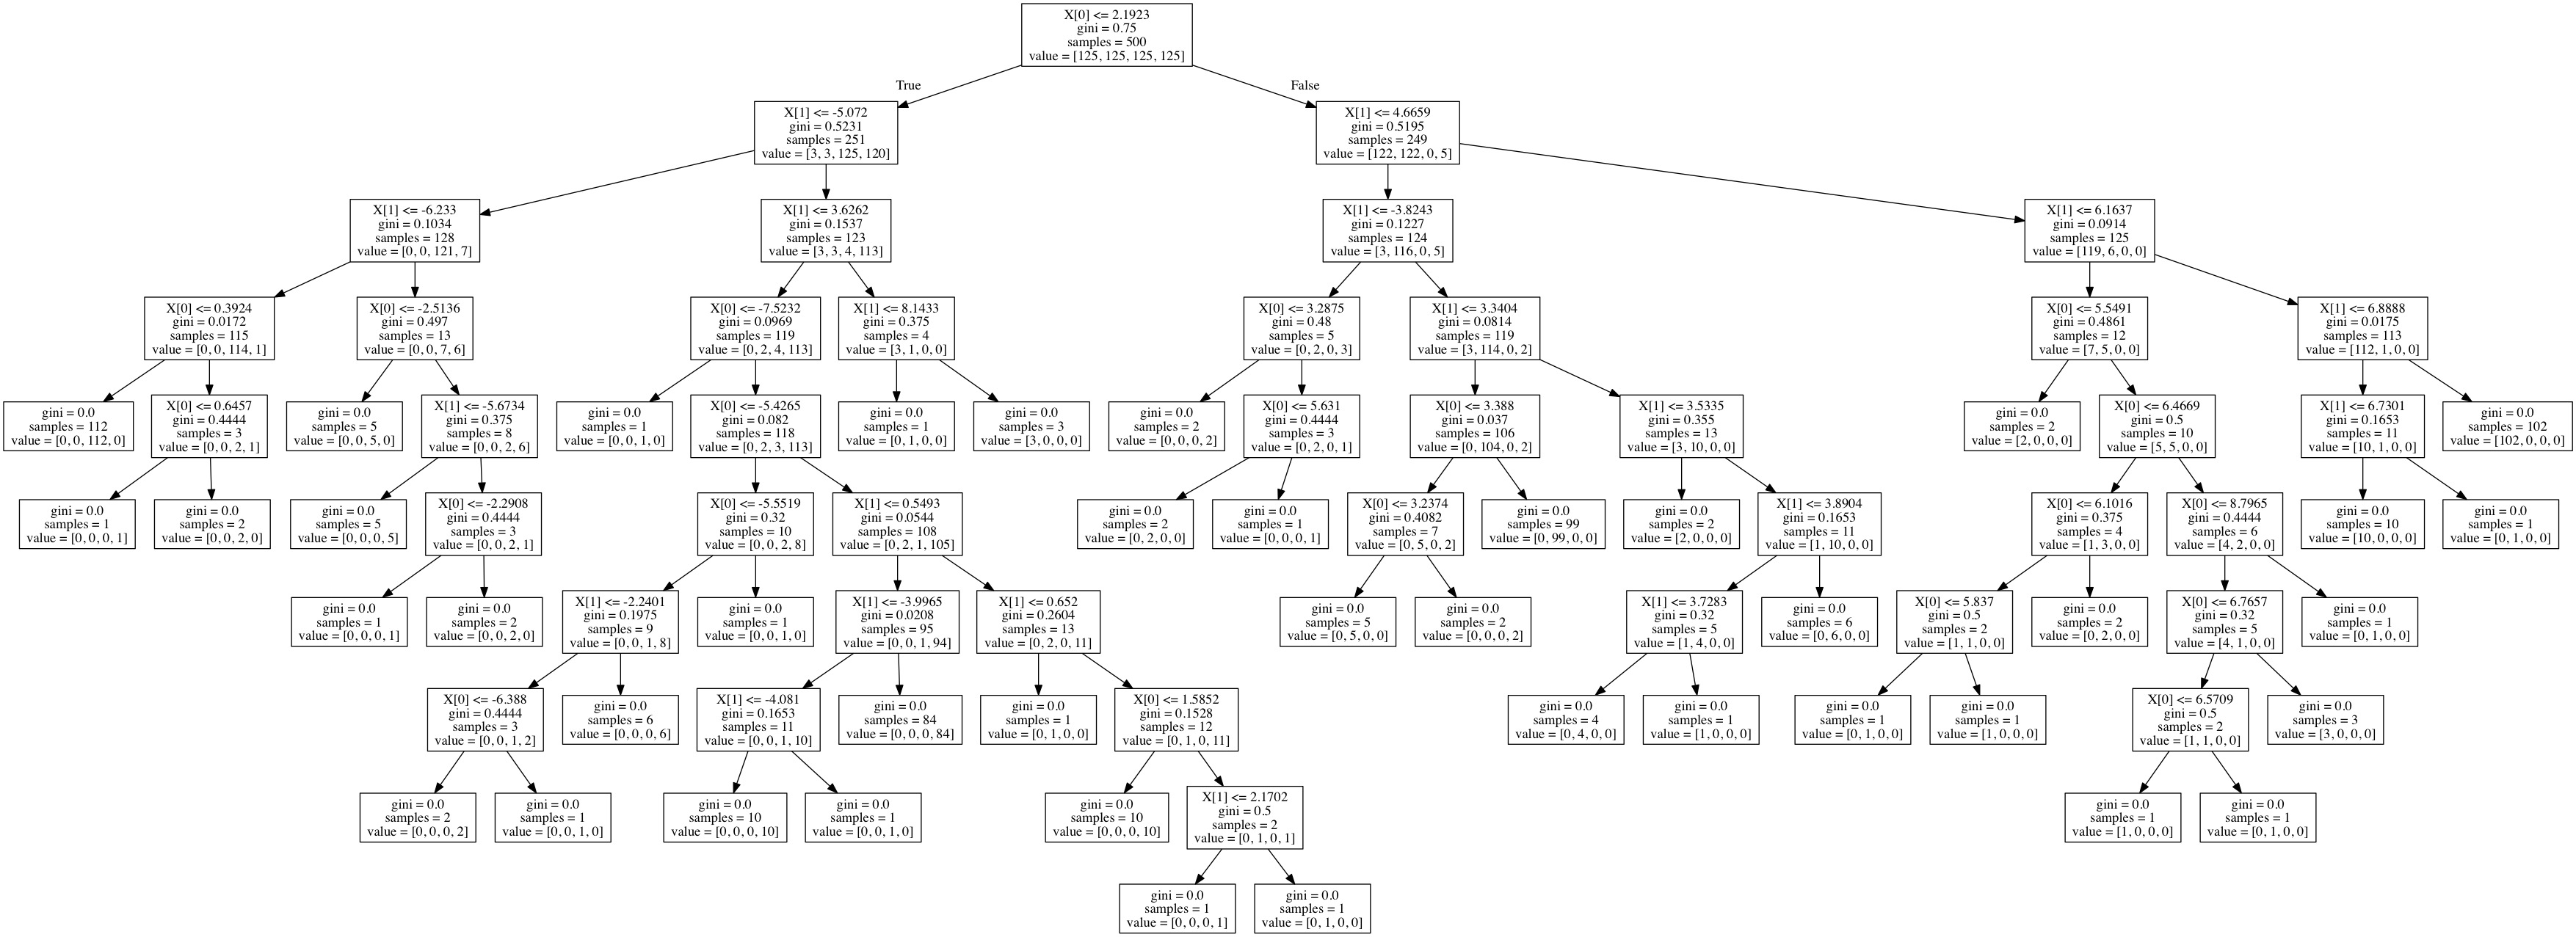

In [12]:
import pydotplus
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file='aula.dot') 
graph = pydotplus.graph_from_dot_file('aula.dot') 
graph.write_jpg('decisiontree_depth_4.jpg')

from IPython.display import Image 
Image('decisiontree_depth_4.jpg')

Sinais de over-fitting: Muitas decisões de quebra levando a grupos muito granulares.

## Random Forests

Metodo baseado em ensemble, ou seja reune 'opiniões' de vários classificadores e tira-se a média das estimativas.
Esses classificadores são classificadores fracos (weak learner), e são assim denominados por que tem apenas uma visão parcial dos fatos. 

Uma parcialidade aleatórea forçada para cada classificador, técnica chamada de *bagging*. O objetivo do *bagging* é reduzir a variancia via um cancelamento de ruídos. 

No RF, os weak learners são decision trees, daí o termo 'forests' para o ensemble.    

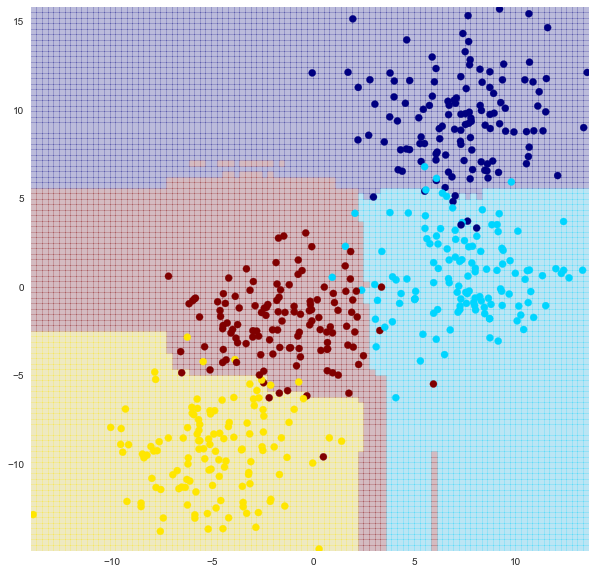

In [16]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators
clf = RandomForestClassifier(n_estimators=100,random_state=0, max_depth=20, min_samples_split=10)

# Get rid of boundaries to avoid error
visualize_tree(clf,X,y,boundaries=False)

## métricas

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
%matplotlib inline

In [18]:
y_pred = clf.predict(X)

##### acurácia

In [19]:
print (accuracy_score(y, y_pred))

0.964


##### matriz de confusão

In [20]:
confusion_matrix(y, y_pred)

array([[121,   4,   0,   0],
       [  3, 120,   0,   2],
       [  0,   0, 121,   4],
       [  0,   2,   3, 120]])

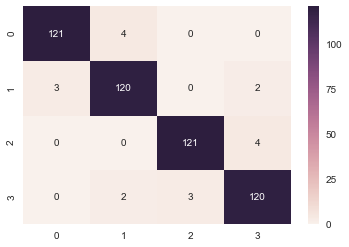

In [21]:
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d')

##### precision, recall e f1-score 
para cada label

In [22]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.97      0.97       125
          1       0.95      0.96      0.96       125
          2       0.98      0.97      0.97       125
          3       0.95      0.96      0.96       125

avg / total       0.96      0.96      0.96       500



In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score, f4e

In [ ]:
roc_auc_score()

In [ ]:
f1_score()